In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM


In [ ]:
pathSnoring = '/content/drive/MyDrive/Data/MFCCData_m/Snoring/' #'/content/drive/MyDrive/PAPER HN/Snoring problem/Data/MFCCData_m/Snoring/'
pathNonSnoring = '/content/drive/MyDrive/Data/MFCCData_m/Snoring/' #'/content/drive/MyDrive/PAPER HN/Snoring problem/Data/MFCCData_m/NonSnoring/'

listSnoreFile = os.listdir(pathSnoring)
listNonSnoreFile = os.listdir(pathNonSnoring)

In [ ]:
train_image = []
label = []

num_feature = 0
for id in range(0, len(listSnoreFile)):
  filePath = os.path.join(pathSnoring, listSnoreFile[id])
  img = np.load(filePath)
  train_image.append(img)
  num_feature += 1
label.extend([1] * num_feature)

num_feature = 0
for id in range(0, len(listNonSnoreFile)):
  filePath = os.path.join(pathNonSnoring, listNonSnoreFile[id])
  img = np.load(filePath)
  train_image.append(img)
  num_feature += 1
label.extend([0] * num_feature)

X, y = np.array(train_image), np.array(label)

In [ ]:
def split_sequence(sequence, timesteps, stride=5):
    result = []
    for i in range(0, len(sequence) - timesteps, stride):
        result.append(sequence[i:i + timesteps])
    return np.array(result)


timesteps = 10
X = np.expand_dims(np.concatenate((split_sequence(X[:500], timesteps), split_sequence(X[500:], timesteps)), axis=0), axis=4)
y = np.array([0] * (X.shape[0] // 2) + [1] * (X.shape[0] // 2))
print(X.shape, y.shape)

(196, 10, 32, 32, 1) (196,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
test = X_test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.222)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.layers import TimeDistributed,  LSTM

# CNN + LSTM
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size = (3,3), padding = "same", activation="relu", input_shape = (32,32,1)))
cnn.add(Conv2D(32, kernel_size = (3,3), padding = "valid", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, kernel_size = (3,3), padding = "same", activation="relu"))
cnn.add(Conv2D(64, kernel_size = (3,3), padding = "valid", activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())

model = Sequential()
model.add(TimeDistributed(cnn, input_shape=(timesteps, 32, 32, 1)))
model.add(LSTM(2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model = Sequential()
model.add(LSTM(2))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',  loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train,  y_train, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
5/5 [==============================] - 5s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 5s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 8/100
5/5 [=================

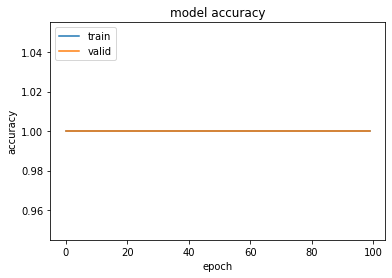

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

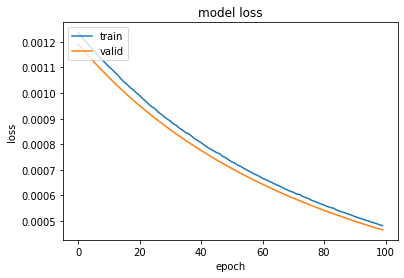

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [21]:
from google.colab import files
model.save('mix_model.h5')
files.download('mix_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>